In [30]:
import numpy as np
from scipy.interpolate import AAA
import matplotlib.pyplot as plt
from skimage.measure import points_in_poly
from polyrat import vandermonde_arnoldi_CGS, vandermonde_arnoldi_eval

In [31]:
def points_in_poly_C(points, polygon):
    points = np.stack((points.real, points.imag), axis=-1)
    polygon = np.stack((polygon.real, polygon.imag), axis=-1)
    return points_in_poly(points, polygon)

In [32]:
s = np.tanh(np.linspace(-12, 12, 300))
Z = np.concatenate((1 + s, 2 + .5j + .5j*s, 1.5 + 1j + .5*s, 1 + 1.5j + .5j*s,
                    .5 + 2j +.5*s, 1j + 1j*s))
w = np.array([0, 2, 2 + 1j, 1 + 1j, 1 + 2j, 2j])
H = np.real(Z)**2

In [33]:
r = AAA(Z, H, clean_up=False, rtol=1e-8, max_terms=100)
poles = r.poles()

/home/up19056/development/Maths-Experiments/PDEs/AAA-LS/venv/lib/python3.13/site-packages/scipy/interpolate/_bary_rational.py:57: RuntimeWarning: AAA failed to converge within 100 iterations.
  self._compute_weights(z, f, **kwargs)


In [34]:
inside = points_in_poly_C(poles, w)

(-1.0, 3.0)

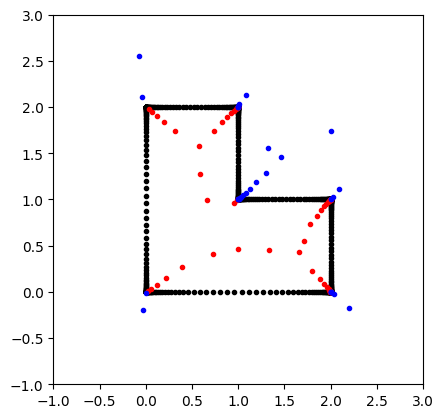

In [35]:
plt.plot(Z.real, Z.imag, '.k')
plt.plot(poles.real[inside], poles.imag[inside], '.r')
plt.plot(poles.real[~inside], poles.imag[~inside], '.b')
plt.gca().set_aspect('equal')
plt.xlim(-1, 3)
plt.ylim(-1, 3)

In [36]:
poles_to_keep = poles[~inside]

n = 20

d = np.min(np.abs(np.subtract.outer(w, poles_to_keep)), axis=0)
P, R, I = vandermonde_arnoldi_CGS(Z[:, None], 11)
Q = d/np.subtract.outer(Z, poles_to_keep)
A = np.concat((P.real, Q.real, -P.imag, -Q.imag), axis=1)
C = np.linalg.lstsq(A, H)[0]

In [37]:
i = C.shape[0]//2
c = C[:i] +1j*C[i:]

def f(z):
    p = vandermonde_arnoldi_eval(z[:, None], R, I).squeeze()
    q = d/np.subtract.outer(z, poles_to_keep)
    return np.concat((p, q), axis=1) @ c

def u(z):
    return np.real(f(z))

In [38]:
tmp = np.linspace(0, 2, 1000)
ZZ = np.add.outer(tmp, 1j*tmp)
U = u(ZZ.ravel()).reshape(ZZ.shape)
U[~points_in_poly_C(ZZ.ravel(), w).reshape(ZZ.shape)] = np.nan

(-1.0, 3.0)

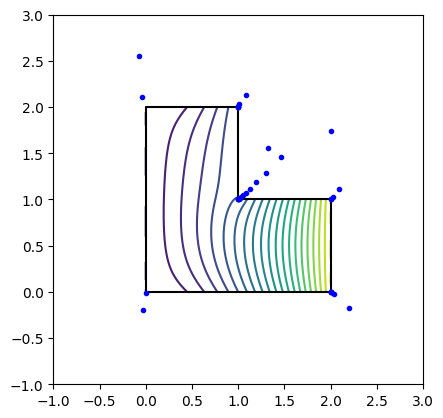

In [39]:
plt.contour(ZZ.real, ZZ.imag, U, 20)
plt.plot(np.concat((w.real, [0])), np.concat((w.imag, [0])), '-k')
plt.plot(poles_to_keep.real, poles_to_keep.imag, '.b')
plt.gca().set_aspect('equal')
plt.xlim(-1, 3)
plt.ylim(-1, 3)